In [45]:
## this  notebook is a study result of https://github.com/jturkewitz/SideProjects/blob/master/Kaggle/Santander_Prod/santander_preprocess.py

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import timeit

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

Populating the interactive namespace from numpy and matplotlib


In [46]:
tic=timeit.default_timer()

In [41]:
#target columns
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
#modify data type
dtype_dict = {'ind_ahor_fin_ult1':np.int8,'ind_aval_fin_ult1':np.int8,'ind_cco_fin_ult1':np.int8,
               'ind_cder_fin_ult1':np.int8,'ind_cno_fin_ult1':np.int8,'ind_ctju_fin_ult1':np.int8,
               'ind_ctma_fin_ult1':np.int8,'ind_ctop_fin_ult1':np.int8,'ind_ctpp_fin_ult1':np.int8,
               'ind_deco_fin_ult1':np.int8,'ind_deme_fin_ult1':np.int8,'ind_dela_fin_ult1':np.int8,
               'ind_ecue_fin_ult1':np.int8,'ind_fond_fin_ult1':np.int8,'ind_hip_fin_ult1':np.int8,
               'ind_plan_fin_ult1':np.int8,'ind_pres_fin_ult1':np.int8,'ind_reca_fin_ult1':np.int8,
               'ind_tjcr_fin_ult1':np.int8,'ind_valo_fin_ult1':np.int8,'ind_viv_fin_ult1':np.int8,
               'ind_nomina_ult1':np.int8,'ind_nom_pens_ult1':np.int8,'ind_recibo_ult1':np.int8}
#categorical to numerical 
canal_dict = {'KAI': 35,'KBG': 17,'KGU': 149,'KDE': 47,'KAJ': 41,'KCG': 59,
 'KHM': 12,'KAL': 74,'KFH': 140,'KCT': 112,'KBJ': 133,'KBL': 88,'KHQ': 157,'KFB': 146,'KFV': 48,'KFC': 4,
 'KCK': 52,'KAN': 110,'KES': 68,'KCB': 78,'KBS': 118,'KDP': 103,'KDD': 113,'KBX': 116,'KCM': 82,
 'KAE': 30,'KAB': 28,'KFG': 27,'KDA': 63,'KBV': 100,'KBD': 109,'KBW': 114,'KGN': 11,
 'KCP': 129,'KAK': 51,'KAR': 32,'KHK': 10,'KDS': 124,'KEY': 93,'KFU': 36,'KBY': 111,
 'KEK': 145,'KCX': 120,'KDQ': 80,'K00': 50,'KCC': 29,'KCN': 81,'KDZ': 99,'KDR': 56,
 'KBE': 119,'KFN': 42,'KEC': 66,'KDM': 130,'KBP': 121,'KAU': 142,'KDU': 79,
 'KCH': 84,'KHF': 19,'KCR': 153,'KBH': 90,'KEA': 89,'KEM': 155,'KGY': 44,'KBM': 135,
 'KEW': 98,'KDB': 117,'KHD': 2,'RED': 8,'KBN': 122,'KDY': 61,'KDI': 150,'KEU': 72,
 'KCA': 73,'KAH': 31,'KAO': 94,'KAZ': 7,'004': 83,'KEJ': 95,'KBQ': 62,'KEZ': 108,
 'KCI': 65,'KGW': 147,'KFJ': 33,'KCF': 105,'KFT': 92,'KED': 143,'KAT': 5,'KDL': 158,
 'KFA': 3,'KCO': 104,'KEO': 96,'KBZ': 67,'KHA': 22,'KDX': 69,'KDO': 60,'KAF': 23,'KAW': 76,
 'KAG': 26,'KAM': 107,'KEL': 125,'KEH': 15,'KAQ': 37,'KFD': 25,'KEQ': 138,'KEN': 137,
 'KFS': 38,'KBB': 131,'KCE': 86,'KAP': 46,'KAC': 57,'KBO': 64,'KHR': 161,'KFF': 45,
 'KEE': 152,'KHL': 0,'007': 71,'KDG': 126,'025': 159,'KGX': 24,'KEI': 97,'KBF': 102,
 'KEG': 136,'KFP': 40,'KDF': 127,'KCJ': 156,'KFR': 144,'KDW': 132,-1: 6,'KAD': 16,
 'KBU': 55,'KCU': 115,'KAA': 39,'KEF': 128,'KAY': 54,'KGC': 18,'KAV': 139,'KDN': 151,
 'KCV': 106,'KCL': 53,'013': 49,'KDV': 91,'KFE': 148,'KCQ': 154,'KDH': 14,'KHN': 21,
 'KDT': 58,'KBR': 101,'KEB': 123,'KAS': 70,'KCD': 85,'KFL': 34,'KCS': 77,'KHO': 13,
 'KEV': 87,'KHE': 1,'KHC': 9,'KFK': 20,'KDC': 75,'KFM': 141,'KHP': 160,'KHS': 162,
 'KFI': 134,'KGV': 43}

## categorical to numerical

pais_dict = {'LV': 102,'CA': 2,'GB': 9,'EC': 19,'BY': 64,'ML': 104,'MT': 118,
 'LU': 59,'GR': 39,'NI': 33,'BZ': 113,'QA': 58,'DE': 10,'AU': 63,'IN': 31,
 'GN': 98,'KE': 65,'HN': 22,'JM': 116,'SV': 53,'TH': 79,'IE': 5,'TN': 85,
 'PH': 91,'ET': 54,'AR': 13,'KR': 87,'GA': 45,'FR': 8,'SG': 66,'LB': 81,
 'MA': 38,'NZ': 93,'SK': 69,'CN': 28,'GI': 96,'PY': 51,'SA': 56,'PL': 30,
 'PE': 20,'GE': 78,'HR': 67,'CD': 112,'MM': 94,'MR': 48,'NG': 83,'HU': 106,
 'AO': 71,'NL': 7,'GM': 110,'DJ': 115,'ZA': 75,'OM': 100,'LT': 103,'MZ': 27,
 'VE': 14,'EE': 52,'CF': 109,'CL': 4,'SL': 97,'DO': 11,'PT': 26,'ES': 0,
 'CZ': 36,'AD': 35,'RO': 41,'TW': 29,'BA': 61,'IS': 107,'AT': 6,'ZW': 114,
 'TR': 70,'CO': 21,'PK': 84,'SE': 24,'AL': 25,'CU': 72,'UY': 77,'EG': 74,'CR': 32,
 'GQ': 73,'MK': 105,'KW': 92,'GT': 44,'CM': 55,'SN': 47,'KZ': 111,'DK': 76,
 'LY': 108,'AE': 37,'PA': 60,'UA': 49,'GW': 99,'TG': 86,'MX': 16,'KH': 95,
 'FI': 23,'NO': 46,'IT': 18,'GH': 88, 'JP': 82,'RU': 43,'PR': 40,'RS': 89,
 'DZ': 80,'MD': 68,-1: 1,'BG': 50,'CI': 57,'IL': 42,'VN': 90,'CH': 3,'US': 15,'HK': 34,
 'CG': 101,'BO': 62,'BR': 17,'BE': 12,'BM': 117}

max_val = 0
for key,item in pais_dict.items():
    if item > max_val:
        max_val = item

emp_dict = {'N':0,-1:-1,'A':1,'B':2,'F':3,'S':4}
indfall_dict = {'N':0,-1:-1,'S':1}
sexo_dict = {'V':0,'H':1,-1:-1}
tiprel_dict = {'A':0,-1:-1,'I':1,'P':2,'N':3,'R':4}
indresi_dict = {'N':0,-1:-1,'S':1}
indext_dict = {'N':0,-1:-1,'S':1}
conyuemp_dict = {'N':0,-1:-1,'S':1}
segmento_dict = {-1:-1,'01 - TOP':1,'02 - PARTICULARES':2,'03 - UNIVERSITARIO':3}
#%%

def resize_data(DF,is_DF=True):
    DF.replace(' NA', -1, inplace=True)
    DF.replace('         NA', -1, inplace=True)
    DF.fillna(-1, inplace=True)
    DF['ncodpers'] = DF['ncodpers'].astype(np.int32)
    DF['renta'] = DF['renta'].astype(np.float64)
    DF['renta'] = DF['renta'].astype(np.int64)
    DF['indrel'] = DF['indrel'].map(lambda x: 2 if x == 99 else x).astype(np.int8)

    DF['ind_empleado'] = DF['ind_empleado'].map(lambda x: emp_dict[x]).astype(np.int8)

    DF['sexo'] = DF['sexo'].map(lambda x: sexo_dict[x]).astype(np.int8)
    DF['age'] = DF['age'].astype(np.int16)
    DF['ind_nuevo'] = DF['ind_nuevo'].astype(np.int8)
    DF['antiguedad'] = DF['antiguedad'].map(lambda x: -1 if x == '     NA' else x).astype(int)
    DF['antiguedad'] = DF['antiguedad'].map(lambda x: -1 if x == -999999 else x).astype(np.int16)
    DF['indrel_1mes'] = DF['indrel_1mes'].map(lambda x: -2 if x == 'P' else x).astype(np.float16)
    DF['indrel_1mes'] = DF['indrel_1mes'].astype(np.int8)

    DF['tiprel_1mes'] = DF['tiprel_1mes'].map(lambda x: tiprel_dict[x]).astype(np.int8)

    DF['indresi'] = DF['indresi'].map(lambda x: indresi_dict[x]).astype(np.int8)

    DF['indext'] = DF['indext'].map(lambda x: indext_dict[x]).astype(np.int8)

    DF['conyuemp'] = DF['conyuemp'].map(lambda x: conyuemp_dict[x]).astype(np.int8)

    DF['canal_entrada'] = DF['canal_entrada'].map(lambda x: canal_dict[x]).astype(np.int16)


    DF['indfall'] = DF['indfall'].map(lambda x: indfall_dict[x]).astype(np.int8)

    DF['pais_residencia'] = DF['pais_residencia'].map(lambda x: pais_dict[x]).astype(np.int8)

    DF['tipodom'] = DF['tipodom'].astype(np.int8)

    DF['cod_prov'] = DF['cod_prov'].astype(np.int8)

    DF.drop('nomprov',axis=1,inplace=True)

    DF['ind_actividad_cliente'] = DF['ind_actividad_cliente'].astype(np.int8)

    DF['fecha_dato_month'] = DF['fecha_dato'].map(lambda x: int(x[5:7])).astype(np.int8)
    DF['fecha_dato_year'] = DF['fecha_dato'].map(lambda x: int(x[0:4]) - 2015).astype(np.int8)
    DF['month_int'] = (DF['fecha_dato_month'] + 12 * DF['fecha_dato_year']).astype(np.int8)
    DF.drop('fecha_dato',axis=1,inplace=True)

    DF['fecha_alta'] = DF['fecha_alta'].map(lambda x: '2020-01-01' if x == -1 else x)
    DF['fecha_alta_month'] = DF['fecha_alta'].map(lambda x: int(x[5:7])).astype(np.int16)
    DF['fecha_alta_year'] = DF['fecha_alta'].map(lambda x: int(x[0:4]) - 1995).astype(np.int16)
    DF['fecha_alta_day'] = DF['fecha_alta'].map(lambda x: int(x[8:10])).astype(np.int16)
    DF['fecha_alta_month_int'] = (DF['fecha_alta_month'] + 12 * DF['fecha_alta_year']).astype(np.int16)
    DF['fecha_alta_day_int'] = (DF['fecha_alta_day'] + 30 * DF['fecha_alta_month'] + 365 * DF['fecha_alta_year']).astype(np.int32)
    DF.drop('fecha_alta',axis=1,inplace=True)
    DF['ult_fec_cli_1t'] = DF['ult_fec_cli_1t'].map(lambda x: '2020-01-01' if x == -1 else x)
    DF['ult_fec_cli_1t_month'] = DF['ult_fec_cli_1t'].map(lambda x: int(x[5:7])).astype(np.int16)
    DF['ult_fec_cli_1t_year'] = DF['ult_fec_cli_1t'].map(lambda x: int(x[0:4]) - 2015).astype(np.int16)
    DF['ult_fec_cli_1t_day'] = DF['ult_fec_cli_1t'].map(lambda x: int(x[8:10])).astype(np.int16)
    DF['ult_fec_cli_1t_month_int'] = (DF['ult_fec_cli_1t_month'] + 12 * DF['ult_fec_cli_1t_year']).astype(np.int8)
    DF.drop('ult_fec_cli_1t',axis=1,inplace=True)

    DF['segmento'] = DF['segmento'].map(lambda x: segmento_dict[x]).astype(np.int8)

    for col in target_cols:
        if is_DF:
            DF[col] = DF[col].astype(np.int8)

    return DF

In [47]:
## because the original data is too large. We read them in chunks
reader = pd.read_csv("train_ver2.csv",chunksize=100000, header=0)

train = pd.concat([resize_data(chunk) for chunk in reader])
train.head()

,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,...,month_int,fecha_alta_month,fecha_alta_year,fecha_alta_day,fecha_alta_month_int,fecha_alta_day_int,ult_fec_cli_1t_month,ult_fec_cli_1t_year,ult_fec_cli_1t_day,ult_fec_cli_1t_month_int
0,1375586,0,0,1,35,0,6,1,1,0,...,1,1,20,12,241,7342,1,5,1,61
1,1050611,0,0,0,23,0,35,1,1,1,...,1,8,17,10,212,6455,1,5,1,61
2,1050612,0,0,0,23,0,35,1,1,1,...,1,8,17,10,212,6455,1,5,1,61
3,1050613,0,0,1,22,0,35,1,1,1,...,1,8,17,10,212,6455,1,5,1,61
4,1050614,0,0,0,23,0,35,1,1,0,...,1,8,17,10,212,6455,1,5,1,61


In [43]:
train.shape

(13647309, 56)

In [ ]:
reader_2 = pd.read_csv('test_ver2.csv', chunksize=10000, header=0)
test = pd.concat([resize_data(chunk,is_DF=False) for chunk in reader_2])
toc=timeit.default_timer()
print('Load Time',toc - tic)

train.to_csv('train_hash.csv', index=False)
test.to_csv('test_hash.csv', index=False)
test.shape

Load Time 925.8890933552749


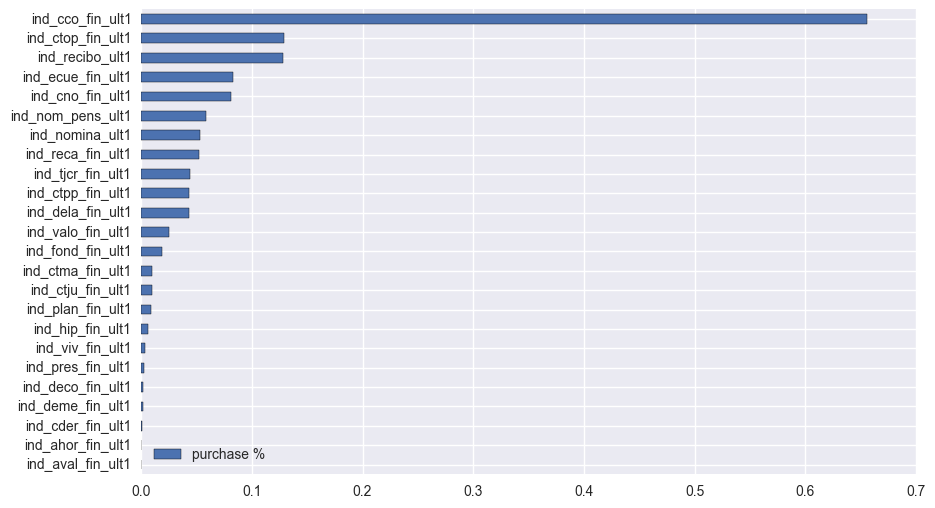

In [55]:
pd.DataFrame(train.filter(regex = '_ult1$').describe().ix['mean']).sort_values(by = 'mean').plot(kind = 'barh')
plt.legend(['purchase %'],loc = 'best')